In [1]:
import numpy as np 
from scipy.linalg import dft
import matplotlib.pyplot as plt

### Construct a signal with a high freq and low freq component (to emulate SA + Planck)

In [2]:
x = np.linspace(0, 6*np.pi, 1000)
N = len(x)

m1 = 0.3*np.sin(10*x) # High freq component 
m2 = np.sin(x) # Low freq component

m = m1 + m2

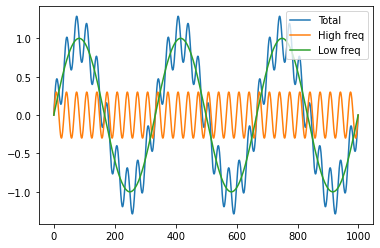

In [3]:
plt.plot(m, label='Total')
plt.plot(m1, label='High freq')
plt.plot(m2, label='Low freq')
plt.legend()

### Use $F$ as the Fourier transform operator and use it to represent the map in terms of its Fourier amplitudes.

### To use your notation, $m = Bb$, where $B=F^{-1}$ contains the complex exponential templates and $b = Fm$ contains the amplitudes. 

### Then the filtered map $m_{filtered} = BIb$, where $I$ is just the identity with some diagonal elements set to 0.

### Then $b$ is what we eventually solve for with the CG method after deriving the equations?

In [18]:
F = dft(N)
F_inv = F.T/N

### First construct $I$

In [97]:
cutoff = 10 # Pick what scale to separate SA and Planck modes

I = -np.eye(N)

for i in range(cutoff):
    I[i][i] = 0
    I[-i][-i] = 0
    
I_c = - np.eye(N) - I   # Construct the complement

### Check that the cutoff number separates the 2 frequencies

/scratch/yuyang/conda/envs/toast/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/scratch/yuyang/conda/envs/toast/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(950.0, 1000.0)

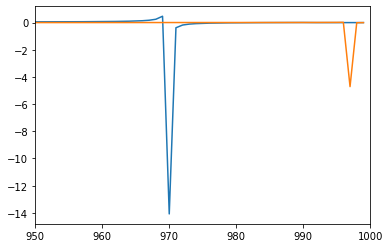

In [106]:
# plt.plot(F @ m)
plt.plot(I @ F @ m)
plt.plot(I_c @ F @ m)
plt.xlim([950, 1000])

### Now define the frequency domain filter $A = F^{-1}IF$ and check its effect on the map $m$

In [107]:
A = F_inv @ I @ F
A_c = F_inv @ I_c @ F # (1 - A)

/scratch/yuyang/conda/envs/toast/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/scratch/yuyang/conda/envs/toast/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/scratch/yuyang/conda/envs/toast/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


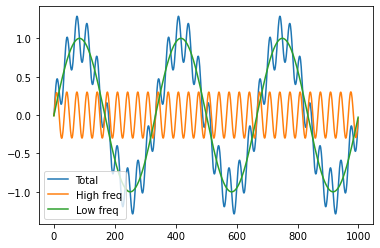

In [108]:
plt.plot(A @ m + A_c @ m, label='Total')
plt.plot(A @ m, label='High freq') #Small scale modes
plt.plot(A_c @ m, label='Low freq') #Large scale modes
plt.legend()

### Filtering operator A can sucessfully split the map into low and high freq modes! Not sure why the phase is flipped, though

/scratch/yuyang/conda/envs/toast/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


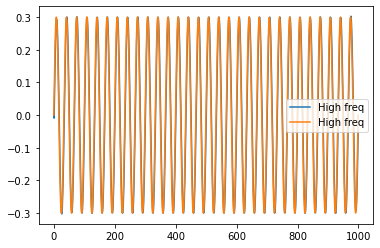

In [109]:
# plt.plot(A @ m + A_c @ m, label='Total')
plt.plot(A @ m, label='High freq') #Small scale modes
# plt.plot(A_c @ m, label='Low freq') #Large scale modes
# plt.plot(m, label='Total')
plt.plot(m1, label='High freq')
# plt.plot(m2, label='Low freq')
plt.legend()

/scratch/yuyang/conda/envs/toast/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


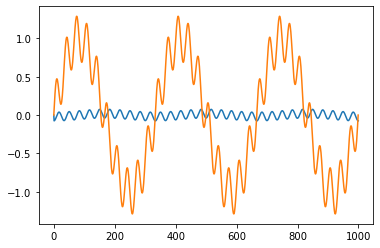

In [111]:
plt.plot(A @ m + A_c @ m - m)
plt.plot(m)